# Weight Details Editor

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Establish SQL connection.
sql_connection = sqlite3.connect('diet.sqlite')
# Import desired table and set the index to id.
current_details = pd.read_sql('SELECT * FROM weight_details_2023', sql_connection, index_col='index')
current_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
28,1000029,2023-05-24 14:57:23,190.2,23.1,80.1,43.9,REST
29,1000030,2023-05-25 16:00:57,189.6,25.2,77.2,47.7,REST
30,1000031,2023-05-26 20:49:52,194.2,25.4,78.9,49.4,REST
31,1000032,2023-05-28 16:00:34,190.6,24.4,78.6,46.6,CHST
32,1000033,2023-05-29 15:40:37,195.4,26.0,78.7,50.7,BACK


## Create New Entry

In [2]:
# Create a new entry.
e_id = current_details.iloc[-1, 0] + 1
weight_entry = float(input("Enter Weight: "))
bf_entry = float(input("Enter Body Fat Percentage: "))
mm_entry = float(input("Enter Muscle Mass: "))
fm_entry = float(input("Enter Fat Mass: "))
wt_entry = input("Enter Workout Type: ")
new_entry = [e_id, pd.to_datetime("today").round(freq="S"), weight_entry, bf_entry, mm_entry, fm_entry, wt_entry]
current_details.loc[len(current_details)] = new_entry
current_details['date_time'] = pd.to_datetime(current_details['date_time'])
new_details = current_details
new_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
29,1000030,2023-05-25 16:00:57,189.6,25.2,77.2,47.7,REST
30,1000031,2023-05-26 20:49:52,194.2,25.4,78.9,49.4,REST
31,1000032,2023-05-28 16:00:34,190.6,24.4,78.6,46.6,CHST
32,1000033,2023-05-29 15:40:37,195.4,26.0,78.7,50.7,BACK
33,1000034,2023-05-30 15:41:25,196.6,25.0,80.5,49.2,REST


## Data Manipulation

In [ ]:
# Update data at position.
# current_details.loc[1, 'date_time'] = '2023-05-13 21:49:00'
# current_details.iloc[-1,-3] = 78.7

# Drop operations
# current_details.drop(index=current_details.index[-1], axis=0, inplace=True) # Remove last row

new_details.tail()

## Update SQL

In [3]:
# Export updated table to sql with time stamp.
new_details.to_sql('weight_details_2023', con, if_exists='replace')

# TODO: MANUALLY REVIEW AND EXPORT NEW TABLE TO CSV AS BACKUP!!

34

In [4]:
# Get body fat info
# FIXME: Might not need this
new_details.loc[:,'bodyfat_percentage'] = new_details['bodyfat_percentage'].astype(float)
new_details.dtypes

entry_id                       int64
date_time             datetime64[ns]
body_weight                  float64
bodyfat_percentage           float64
muscle_mass                  float64
fat_mass                     float64
workout_type                  object
dtype: object

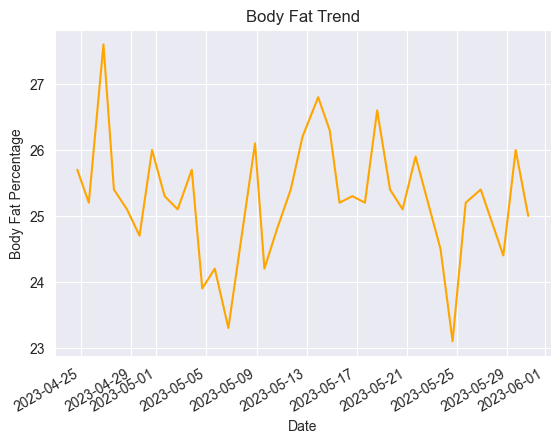

In [5]:
# Plot the data
import seaborn as sns
new_details.plot(
    kind='line',
    title="Body Fat Trend",
    x='date_time',
    xlabel="Date",
    y='bodyfat_percentage',
    ylabel="Body Fat Percentage",
    legend=False,
    color='orange'
)

plt.show()

<h2> LOG: </h2>
<ul>
  <li> 2023-05-15: Wine removed from diet will determine effectiveness 14 days from log date.
  <br> - NO EFFECTIVE CHANGE IN BODYFAT %</li>
  <br>
  <li> 2023-05-29: Reduse the range of calorie cycle determine effectiveness 30 days from log date </li>
</ul>
